In [55]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.linalg as LA

#### a).

In [2]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [6]:
rho = 0.85
mu = 11.4

In [7]:
z = np.zeros(500)
def simu(z_t, i):
    if i < 500:
        z_t1 = rho*z_t + (1-rho)*mu + eps_vec[i]
        z[i] = z_t1
        return simu(z[i], i+1)
    else:
        return z

In [11]:
z=simu(unif_vec[0],0)

In [12]:
z

array([ 3.23849021,  4.60812198,  5.2164978 ,  5.51887776,  6.24374493,
        6.18543692,  7.30476859,  7.80913311,  8.44675432,  8.65202383,
        8.89116037,  8.42012593,  8.77389048,  9.31889733,  8.94063031,
        9.34590613,  9.33842967, 10.01310826,  9.98214958, 10.88059339,
       10.92575602, 11.02585647, 10.8737385 , 12.92131757, 12.71811919,
       12.62439986, 11.16738531, 11.61012107, 11.43907413, 11.32209193,
       10.92932058, 11.89810392, 12.13057829, 11.94375158, 11.47441936,
       11.50859111, 11.59663594, 12.02894585, 12.59795921, 13.06894091,
       11.8213986 , 12.01822875, 11.57692535, 11.59296933, 12.77429957,
       13.4019536 , 12.72535125, 12.54826745, 11.43187522, 11.68122987,
       10.85853018, 11.44887645, 10.44241322, 10.28012835, 10.77520778,
       10.88509369, 11.24180585, 11.44672244, 11.84573871, 11.62898043,
       11.4110171 , 12.06395449, 12.35695971, 11.3080389 , 12.02417885,
       11.82633057, 11.53746676, 12.47146708, 12.39478164, 11.77

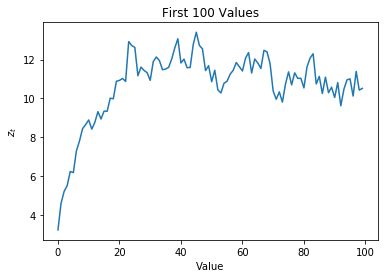

In [23]:
plt.plot(z[:100])
plt.title("First 100 Values")
plt.xlabel("Value")
plt.ylabel("$z_t$")
plt.show()

#### b).

In [25]:
lb = mu-3*sigma
ub = mu+3*sigma

In [31]:
z_vals = np.linspace(lb,ub,5)
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

#### c).

In [32]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

In [33]:
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [35]:
z_bins = np.digitize(z,z_cuts)

In [36]:
z_bins

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2,
       1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 4, 2, 3, 2, 2,
       3, 4, 3, 3, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2,
       2, 3, 3, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 3, 3, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 2,
       4, 3, 3, 3, 2, 3, 4, 4, 3, 4, 4, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2,
       2, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 2, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 2, 2, 4, 3, 4, 3, 3, 2, 2, 1, 1, 1, 0, 0, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 3, 3, 4, 4, 3, 3, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2,

In [51]:
P_hat = np.zeros(shape=(5,5))

In [52]:
for k in range(0,499):
    current = z_bins[k]
    nxt = z_bins[k+1]
    P_hat[current][nxt] += 1

In [53]:
P_hat=P_hat/P_hat.sum(axis = 1, keepdims=True)

In [54]:
P_hat

array([[0.75757576, 0.21212121, 0.03030303, 0.        , 0.        ],
       [0.1       , 0.50909091, 0.34545455, 0.04545455, 0.        ],
       [0.03144654, 0.22012579, 0.48427673, 0.2327044 , 0.03144654],
       [0.        , 0.04273504, 0.34188034, 0.5042735 , 0.11111111],
       [0.        , 0.        , 0.04255319, 0.34042553, 0.61702128]])

#### d).

In [60]:
z_t = np.array([[0], [0],[1],[0],[0]])

In [62]:
res = LA.matrix_power(P_hat.T,3) @ z_t

In [64]:
res[4]

array([0.07752374])

#### e).

In [66]:
eigvals, eigvecmat = LA.eig(P_hat.T)
print(eigvals)

[1.         0.79405964 0.60572911 0.11107399 0.36137544]


In [68]:
eigvecmat

array([[-0.27491649, -0.70799899,  0.41056991, -0.0232403 , -0.15517844],
       [-0.45819415, -0.31439168, -0.43202375,  0.3979737 ,  0.67034374],
       [-0.66229881,  0.17835405, -0.60869305, -0.78776471, -0.17657357],
       [-0.48735196,  0.49910986,  0.12047379,  0.46652157, -0.63730148],
       [-0.19577386,  0.34492677,  0.5096731 , -0.05349027,  0.29870975]])

In [71]:
eigvec = eigvecmat[:, 0] / eigvecmat[:, 0].sum()
state_dist = eigvec
state_dist

array([0.13226453, 0.22044088, 0.31863727, 0.23446894, 0.09418838])

Above is the state probability distribution for the eigenvector for $\lambda = 1$, i.e., the ergodic distribution.

#### f).

In [72]:
z0 = z_vals[2]

In [75]:
x_vec = np.zeros(T)
x_t = z0
xt_ind = 1
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    x_t = x_tp1
    xt_ind = xtp1_ind

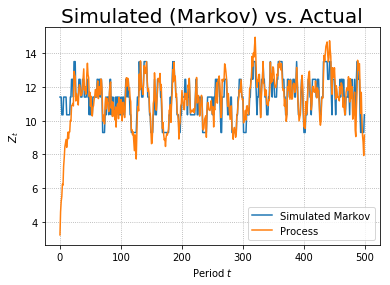

In [80]:
plt.plot(x_vec)
plt.plot(z)
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'Simulated (Markov) vs. Actual', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Simulated Markov', 'Process'])
plt.show()